# Financial Labels

In [12]:
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd 
    
import matplotlib as mpl
import matplotlib.pyplot as plt

from src.data import parse, bars

%matplotlib inline
plt.style.use('ggplot')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10,7

**Question 1** Given the time series of E-mini S&P 500 futures, compute labels on one minute
time bars using the fixed horizon method, where $\tau$ is set at two standard deviations of one-minute returns


Retrieving and cleaning the time series of E-mini S&P 500 futures.

Download the data from: http://www.kibot.com/buy.aspx at the: "Free historical data for your data quality analysis" section

We have the data from the WDC stock and the iShares IVE ETF: https://www.ishares.com/us/products/239728/ishares-sp-500-value-etf

Tick Data info from kibot
http://www.kibot.com/support.aspx#data_format

- The order of the fields in the tick files (with bid/ask prices) is: Date,Time,Price,Bid,Ask,Size.
- The bid/ask prices are recorded whenever a trade occurs and they represent the "national best bid and offer" (NBBO) prices across multiple exchanges and ECNs.
- For each trade, current best bid/ask values are recorded together with the transaction price and volume. Trade records are not aggregated and all transactions are included in their consecutive order.
- The order of fields in our regular tick files (without bid/ask) is: Date,Time,Price,Size.
- The order of fields in our 1, 5 or 10 second files is: Date,Time,Open,High,Low,Close,Volume. It is the same format used in our minute files.
- The stocks and ETFs data includes pre-market (8:00-9:30 a.m. ET), regular (9:30 a.m.-4:00 p.m. ET.) and after market (4:00-6:30 p.m. ET) sessions.
- Trading for SPY (SPDR S&P 500 ETF) and some other liquid ETFs and stocks usually starts at 4 a.m and ends at 8 p.m. ET.

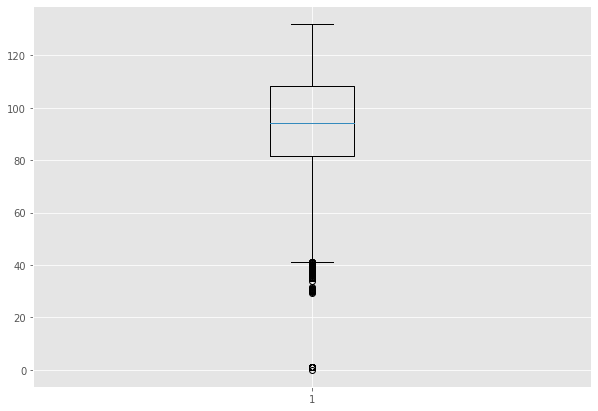

In [13]:
def prepare_data(raw_data_path):
    df = pd.read_csv(raw_data_path,
                     header=None,
                     names=['day', 'time', 'price', 'bid', 'ask', 'vol'])
    df['date'] = pd.to_datetime(df['day'] + df['time'],
                                format='%m/%d/%Y%H:%M:%S')
    df['dollar_vol'] = df['price']*df['vol']
    df = df.set_index('date')
    df = df.drop(['day', 'time'],
                 axis=1)
    return df


raw_data_path = '../data/IVE_tickbidask.txt'
df = prepare_data(raw_data_path)

fig, ax = plt.subplots()
_ = ax.boxplot(df.price)

Labels computation on one minute time bars using the fixed horizon method, where
$\tau = 2 \times \sigma$ where $\sigma$ is the standard deviations of one-minute returns


In [10]:
with open('../data/IVE_tickbidask.txt') as file_input: 
    

The labels' Distribution

The labels' distribution across all days, for each hour of the trading session

Comment 